<a href="https://colab.research.google.com/github/bysubanji/Netflix_movies_and_Tv_shows_clustering/blob/main/Final_Notebook_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



In [1]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<u>Importing all Necessary Libraries</u>

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import plotly.express as px
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

#<u>NETFLIX MOVIES AND TV SHOWS  DATA FRAME</u>

In [4]:
#loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Projects - Almabetter/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=pd.DataFrame(df)

##Data types of each column

In [5]:
#head of df
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#shape of df
df.shape

(7787, 12)

In [7]:
#checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

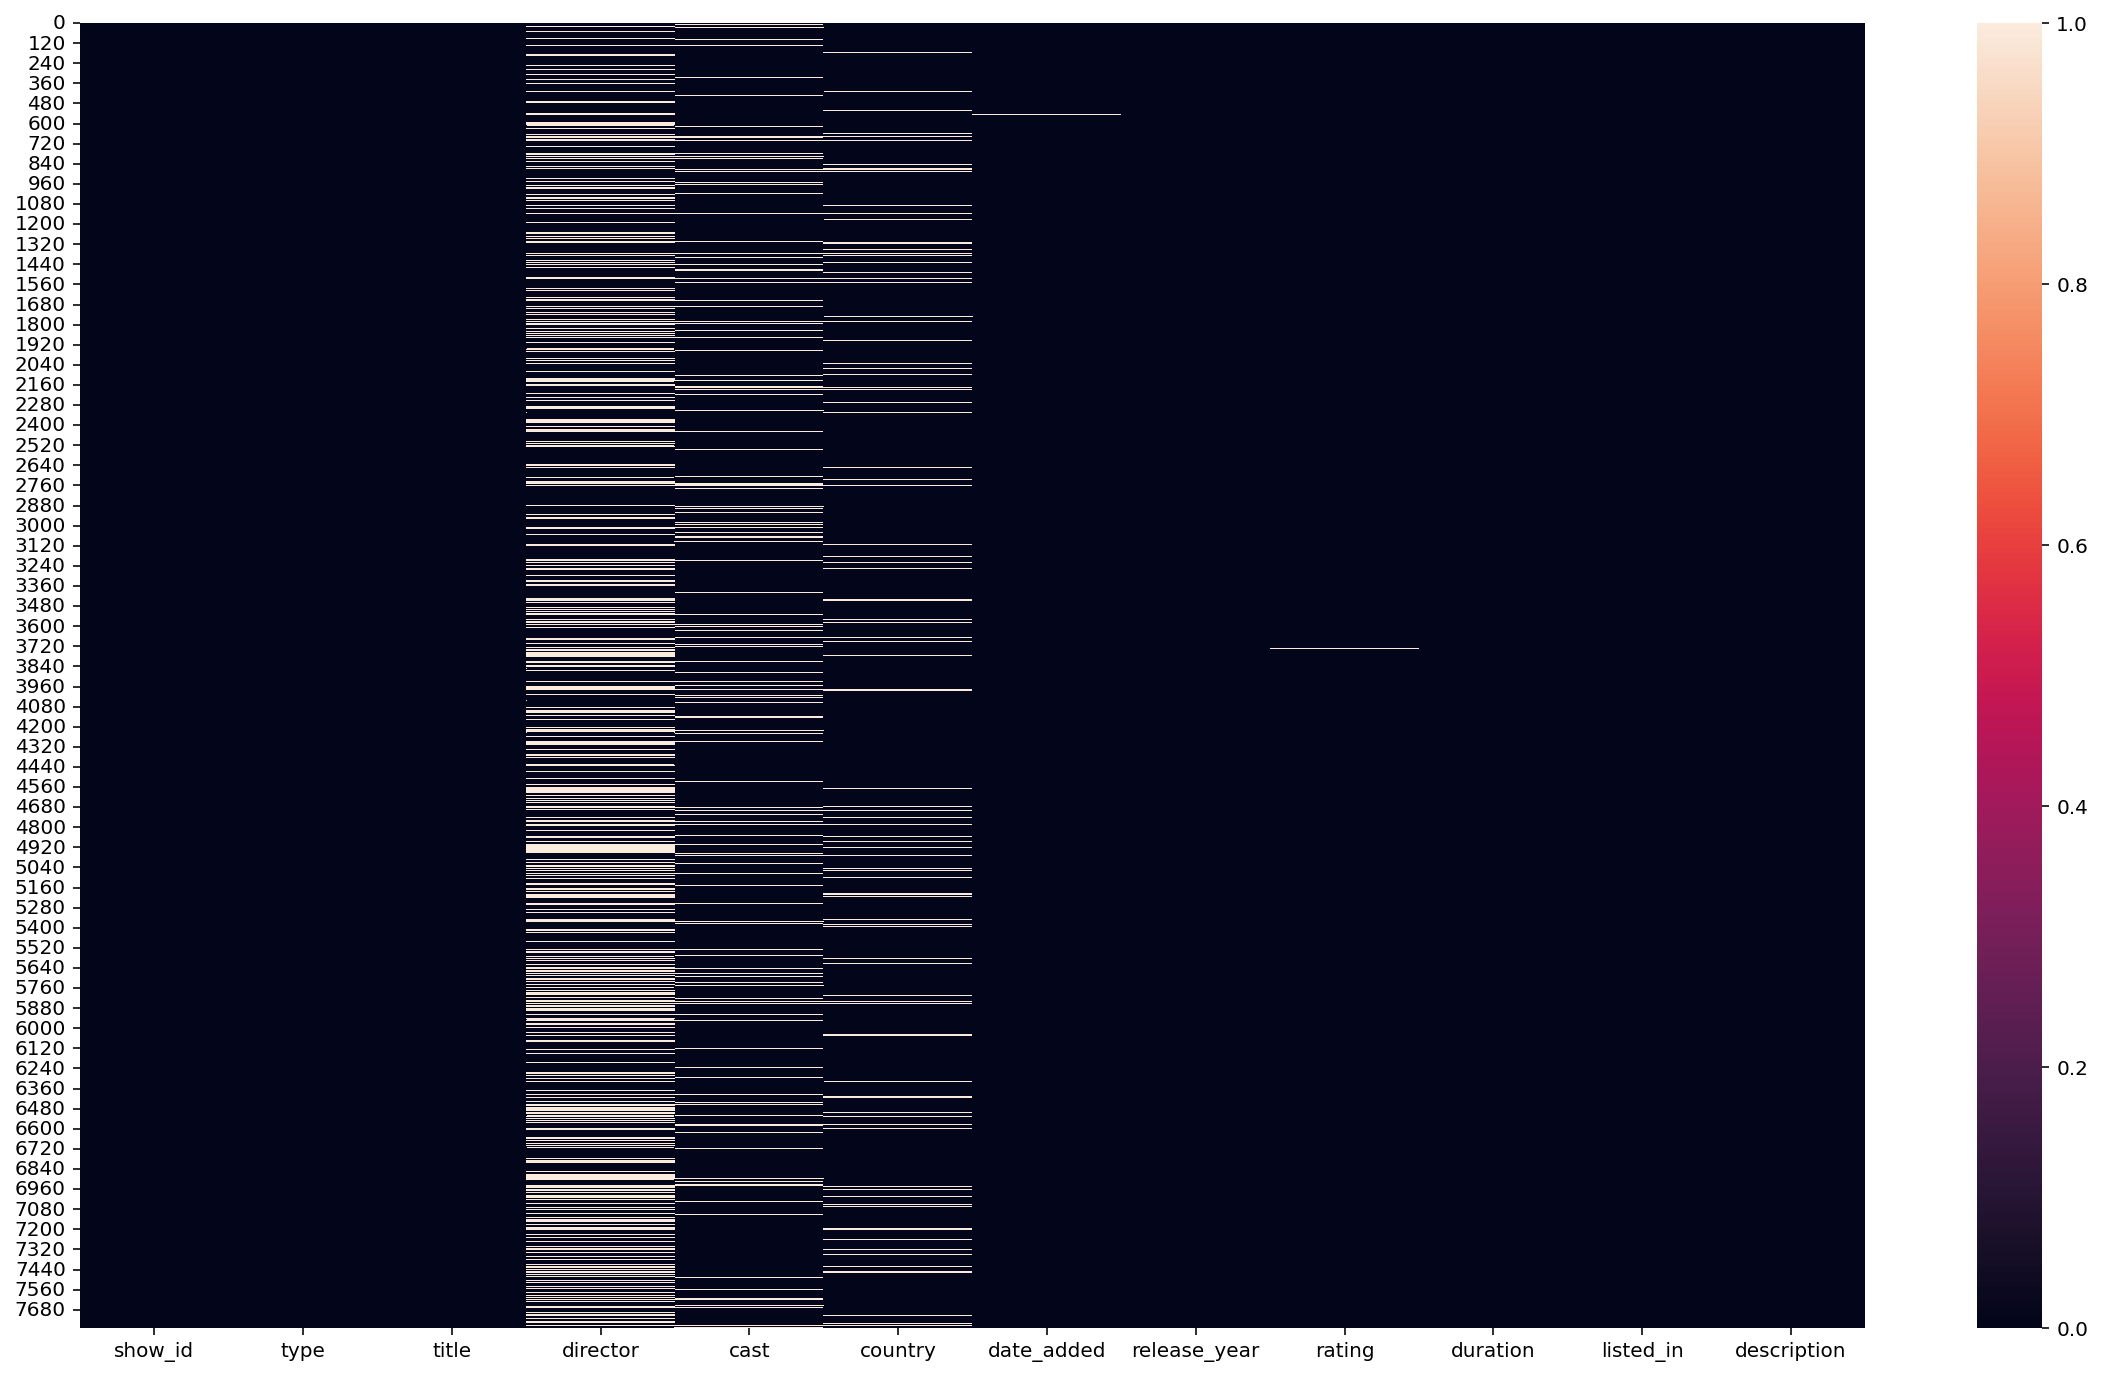

In [8]:
#checking null values by visualizing it
plt.figure(figsize=(20,12))
sns.heatmap(df.isna())

In [9]:
#droping director feature from df
df.drop(['director'],axis=1,inplace=True)
#droping all null values from cast,country,date_added and rating features 
df_cleaned=df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [10]:
#cheacking null values of df_cleaned variable 
df_cleaned.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [11]:
#using lambda funtion for country feature in df_cleaned variable
df_cleaned['country']=df_cleaned['country'].apply(lambda x:x.split(","))

In [12]:
#creating new variable as df_new 
df_new=pd.DataFrame(columns=df_cleaned.columns)

In [13]:
#using iterrows() function in country feature
indic=0
count=0
for index, row in df_cleaned.iterrows():
    if len(df_cleaned.loc[index,'country'])>1:
      count=len(df_cleaned.loc[index,'country'])+count
      for data in df_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(df_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        df_new.loc[indic]=country_name_list
        indic=indic+1
      df_cleaned.drop(index,inplace=True)

In [14]:
#using reset_index() method for df_cleaned variable
df_cleaned.reset_index(drop=True,inplace=True)
df_clean_frame=df_cleaned.append(df_new,ignore_index=True)

In [15]:
#using the lambda function for some data augmentation
df_clean_frame['country']=df_clean_frame['country'].apply(lambda x:x[0])
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:x.strip())
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
df_clean_frame['release_year']=df_clean_frame['release_year'].astype('int')

In [16]:
#changing the names of some features 
df_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [17]:
#clean dataframe
df_clean_frame.drop([6361,6527],inplace=True)
df_clean_frame.reset_index(drop=True,inplace=True)

In [18]:
#head of df_clean_frame
df_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [19]:
#shape of df_clean_frame
df_clean_frame.shape

(8262, 11)

## Data Cleaning and Feature Engineering 

In [20]:
#checking dtype of df_clean_frame
df_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

# 1. Exploratory Data Analysis
###i)Name the cast who has been acted more times only for Indian Movies?
###ii)What is more popular on Netflix, movies or TV shows?
###iii)Name the top two countries where Netflix is most popular?
###iv)In December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month?

__i) Name the cast who has been acted more times only for Indian Movies?__

In [21]:
#extracing india from country column
df_india=df_clean_frame.loc[df_clean_frame['country']=='India',:]

In [22]:
#defining stripping and returning the dates
def stripping(x):
  datas=[]
  for i in x:
    datas.append(i.strip())
  return datas

In [23]:
#using lambda function for Actors feature in df_india variable
df_india['Actors']=df_india['Actors'].apply(lambda x:x.split(','))
df_india['Actors']=df_india['Actors'].apply(lambda x:stripping(x))

In [24]:
#creating actors_list=[]
actors_list=[]
for i in df_india['Actors']:
  actors_list.extend(i)

In [25]:
#top five actors who acted more times in indian movies
actors_df=pd.DataFrame(actors_list,columns=['Actors'])
actors_df=actors_df.value_counts().reset_index()
actors_df.rename(columns={0:'Count'},inplace=True)
actors_df.head(5)

,Actors,Count
0,Anupam Kher,39
1,Shah Rukh Khan,33
2,Naseeruddin Shah,29
3,Akshay Kumar,28
4,Om Puri,27


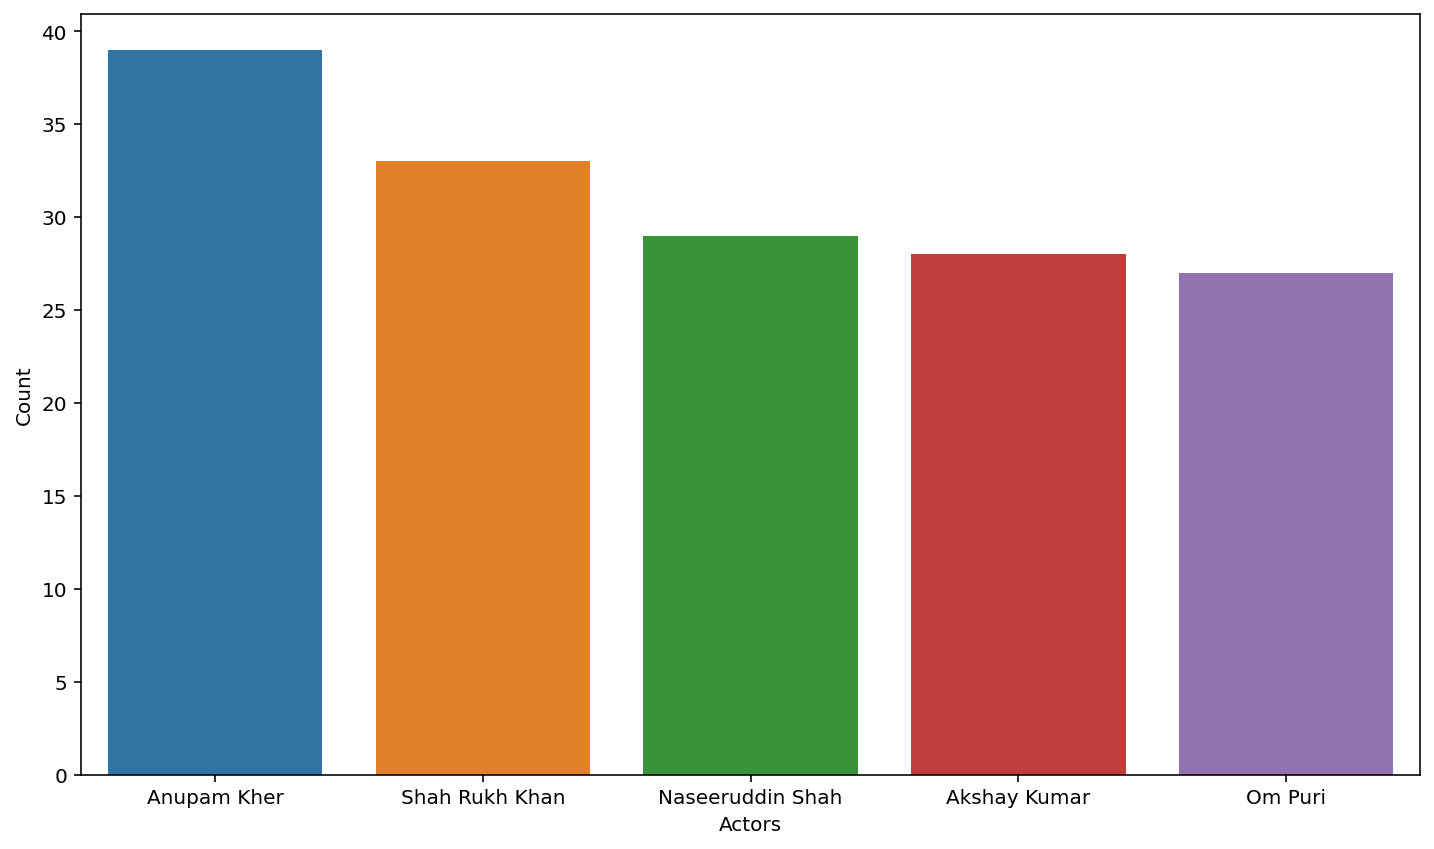

In [26]:
#visualising top five actors who acted more times in indian movies
plt.figure(figsize=(12,7))
sns.barplot(x=actors_df['Actors'].head(5),y=actors_df['Count'].head(5))

As we can see from the plot, Anupam Kher has acted in more Indian films than anyone else.

__ii) What is more popular on Netflix, movies or TV shows?__

In [27]:
#Movies and Tv Shows available on netflix
movies_and_tv_shows=df_clean_frame['Type_of_show'].value_counts().reset_index()
movies_and_tv_shows

,index,Type_of_show
0,Movie,6080
1,TV Show,2182


In [28]:
#visualising What is more popular on Netflix, movies or TV shows
(px.bar(movies_and_tv_shows, x="index",y="Type_of_show", color="index")
.update_layout(title_font_size=50)
.update_xaxes(showgrid=True)
).show()

As we can see in the plot, there are more movies available on Netflix compared to TV shows. That means movies are more popular than TV shows.

__iii) Name the top two countries where Netflix is most popular?__

In [29]:
#top_two countries where netflix is most popular
top_two=df_clean_frame['country'].value_counts().head(3).reset_index()
top_two

,index,country
0,United States,2541
1,India,927
2,United Kingdom,499


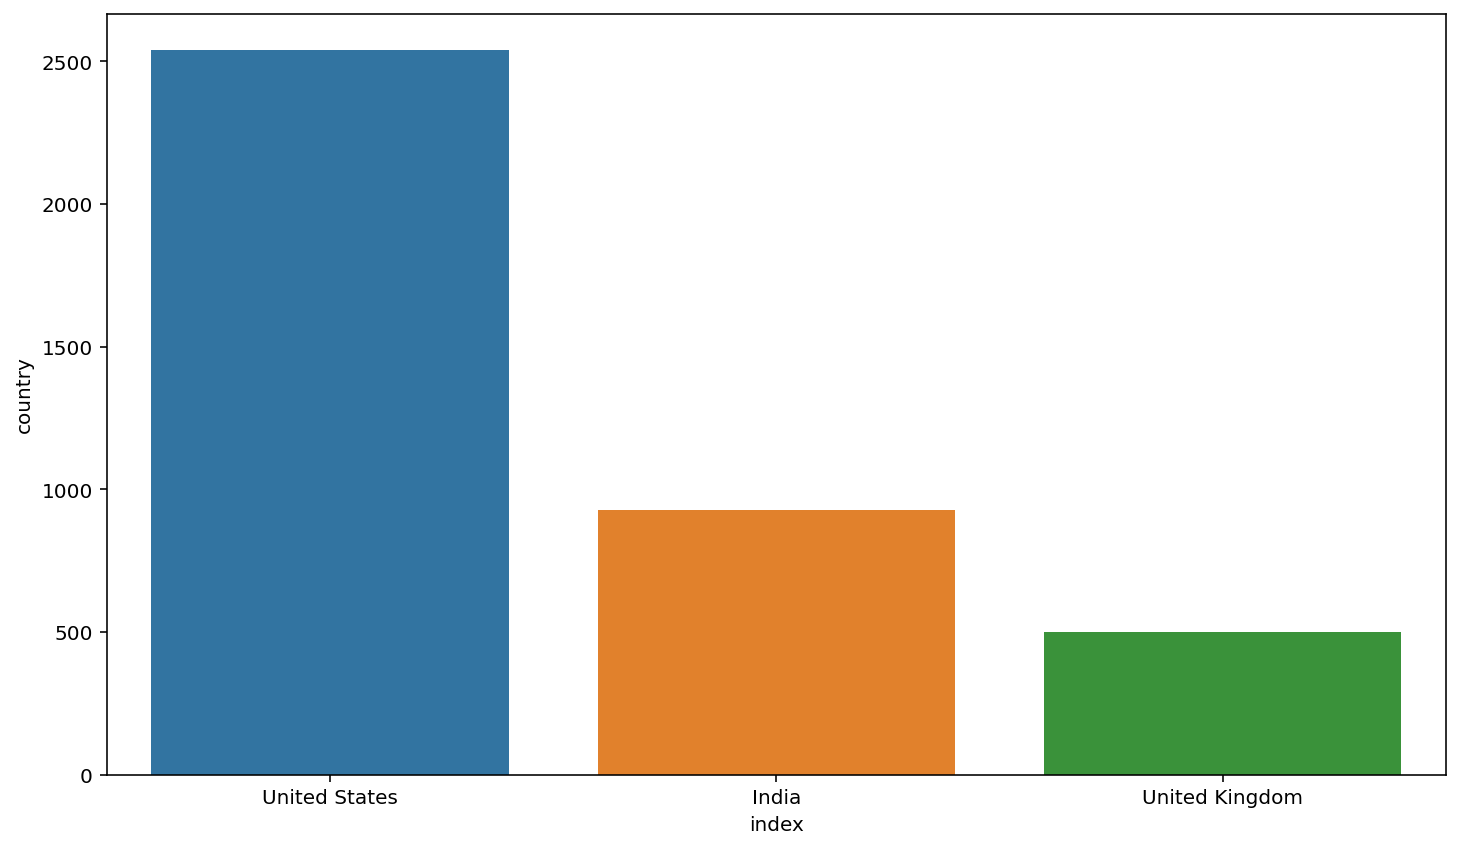

In [30]:
#Visualising Which are the top two countries using Netfilx
plt.figure(figsize=(12,7))
sns.barplot(x=top_two['index'],y=top_two['country'])

As can be seen in the plot above, the United States and India are the two countries where Netflix is most popular.

__iv) In December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month?__

In [31]:
#creating two columns year and month in df_clean_frame variable
df_clean_frame['year']=pd.DatetimeIndex(df_clean_frame['Date_Added_in_netflix']).year
df_clean_frame['month']=pd.DatetimeIndex(df_clean_frame['Date_Added_in_netflix']).month

In [32]:
#creating df_new11 variable
df_new11=pd.DataFrame(columns=df_clean_frame.columns)

In [33]:
#extracting 12th month and 2020 year from month and year feature 
indic=0
for index,row in df_clean_frame.iterrows():
    if (df_clean_frame.loc[index,'month']==12) & (df_clean_frame.loc[index,'year']==2020):
      df_new11.loc[indic]=df_clean_frame.loc[index,:]
      indic=indic+1

In [34]:
#groupby Type_of_show and Ratings
ratings_december_2020=df_new11.groupby(['Type_of_show','Ratings'])['country'].count().reset_index().rename(columns={'country':'count'})
ratings_december_2020

,Type_of_show,Ratings,count
0,Movie,PG,7
1,Movie,PG-13,22
2,Movie,R,20
3,Movie,TV-14,23
4,Movie,TV-G,3
5,Movie,TV-MA,33
6,Movie,TV-PG,5
7,Movie,TV-Y,4
8,Movie,TV-Y7,2
9,TV Show,TV-14,18


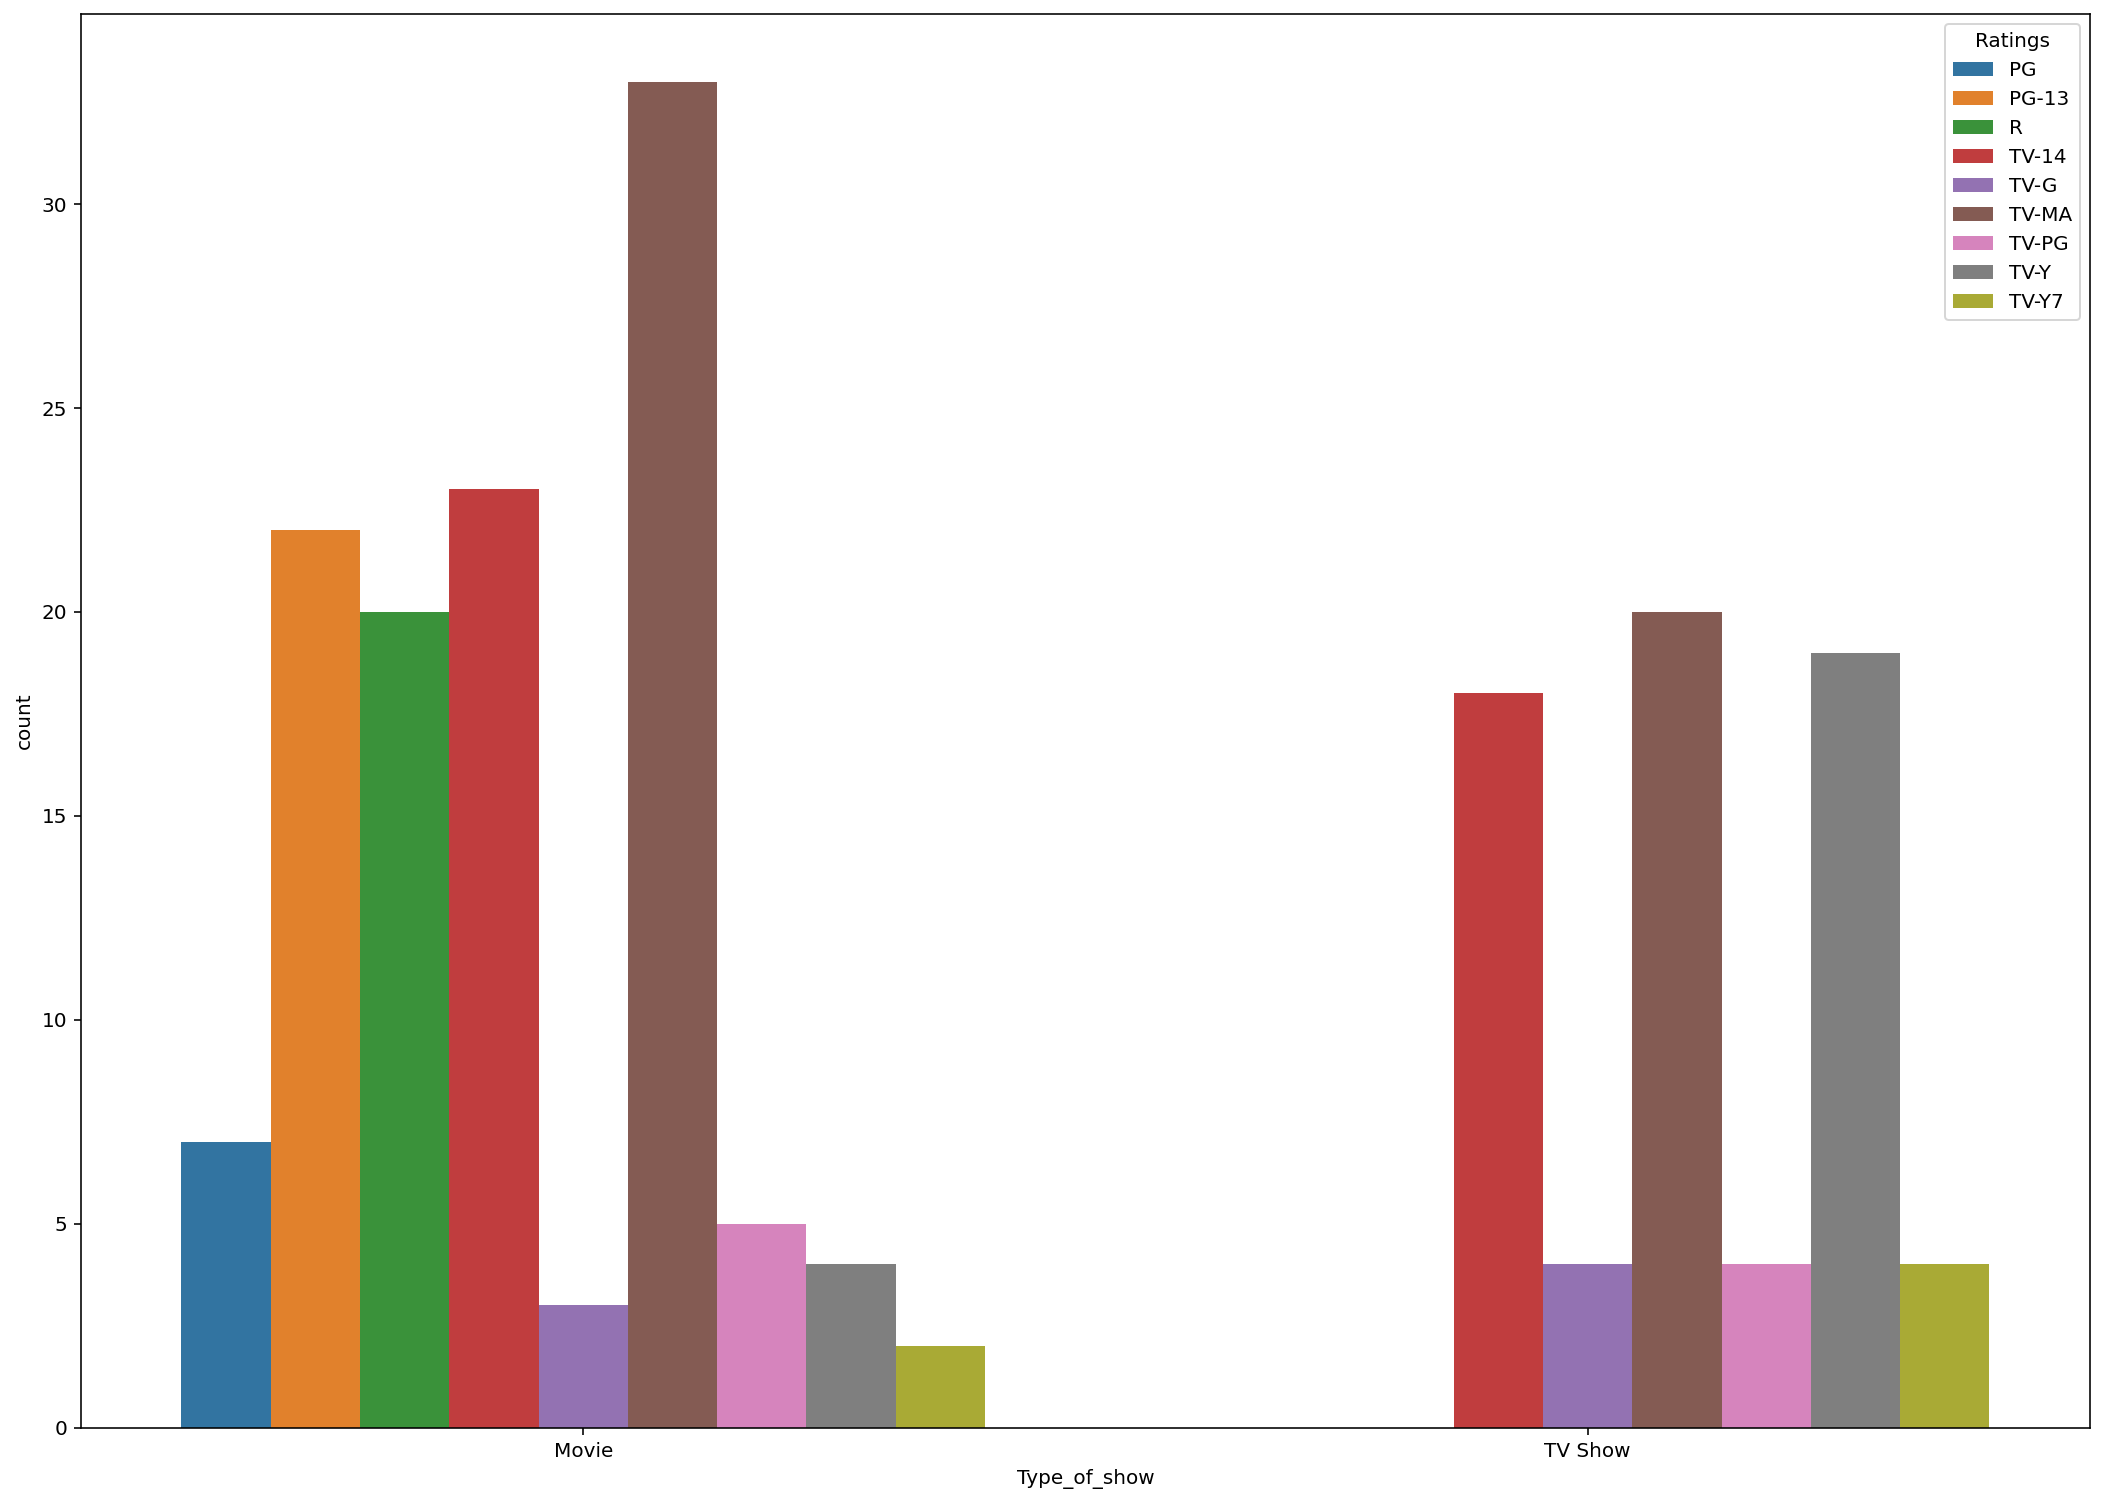

In [35]:
#visualising in December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month
plt.figure(figsize=(18,13))
sns.barplot(x=ratings_december_2020['Type_of_show'],y=ratings_december_2020['count'],hue=ratings_december_2020['Ratings'])

As shown in the plot above, TV-MA ratings in December 2020 are the highest in movies and TV shows, with TV-MA standing for Mature Audience Only. Because this programme is intended for adults, it may not be appropriate for children under the age of 17.

# 2. Understanding what type content is available in different countries


In [36]:
#groupby country and Ratings feature
content_in_different_countries=df_clean_frame.groupby(['country','Ratings'])['Actors'].count().reset_index()
content_in_different_countries.drop('Actors',axis=1,inplace=True)

In [37]:
#visualising what type content is available in different countries
(px.bar(content_in_different_countries, x="Ratings",y="country", color="country")
.update_layout(title_font_size=200)
.update_xaxes(showgrid=True)
).show()

As we can see from the plot above, there are various types of content available, but in most countries, TV-MA content is available, and the TV-MA rating you see on many Netflix TV series signifies that the programme is only suitable for mature viewers. A TV show with a TV-MA rating features graphic violence or a combination of brutal violence. So that could be the reason for it, because the Netflix audience enjoys this type of content. 

# 3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [38]:
#groupby year and type of show feature
tv_rather_than_movies=df_clean_frame.groupby(['year','Type_of_show'])['show_id'].count().reset_index().rename(columns={'show_id':'count'})

In [39]:
#visualising type_of_show feature w.r.t. years
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(tv_rather_than_movies, x='year', y='count', color='Type_of_show')
fig.show()

In the plot above, we can see that Netflix has been increasingly focusing on movies rather than TV shows in recent years, as evidenced by the fact that after 2014, Netflix has relied more on movies than TV shows.